In [1]:
DENSITY_MAX = 0.13
V_MAX = 50.0       # Km / h

def flux_density_func(density):
    return density * speed_density_func(density)

def speed_density_func(density):
    SLOPE_SEG_1 = -1.8
    TRANSITION_SEG_1_TO_2 = 0.0598
    TRANSITION_SEG_2_TO_3 = 0.095
    SPEED_TRANSITION_2_TO_3 = 2.3
    
    SPEED_TRANSITION_1_TO_2 = V_MAX + (SLOPE_SEG_1 * TRANSITION_SEG_1_TO_2)
    SLOPE_SEG_2 = (SPEED_TRANSITION_2_TO_3 - SPEED_TRANSITION_1_TO_2) / (TRANSITION_SEG_2_TO_3 - TRANSITION_SEG_1_TO_2)
    
    SLOPE_SEG_3 = (0 - SPEED_TRANSITION_2_TO_3) / (DENSITY_MAX - TRANSITION_SEG_2_TO_3)
    
    if density < 0:
        return V_MAX
    if density > DENSITY_MAX:
        return 0
    
    if density < TRANSITION_SEG_1_TO_2:
        return V_MAX + (SLOPE_SEG_1 * density)
    elif density < TRANSITION_SEG_2_TO_3:
        SEG_2_Y_INTERCEPT = (SLOPE_SEG_2 * (0 - TRANSITION_SEG_1_TO_2)) + SPEED_TRANSITION_1_TO_2
        return SEG_2_Y_INTERCEPT + (SLOPE_SEG_2 * density)
    else:
        SEG_3_Y_INTERCEPT = (SLOPE_SEG_3 * (0 - TRANSITION_SEG_2_TO_3)) + SPEED_TRANSITION_2_TO_3
        return SEG_3_Y_INTERCEPT + (SLOPE_SEG_3 * density)
    


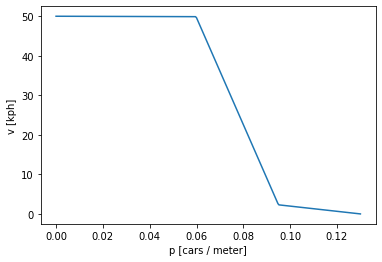

In [2]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(0.0, 0.13, num=300)
y = np.zeros(300)
for i in range(len(x)):
    y[i] = speed_density_func(x[i])
    
plt.ylabel('v [kph]')
plt.xlabel('p [cars / meter]')
plt.plot(x,y)

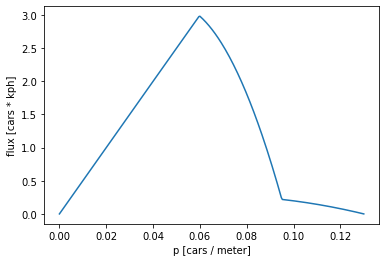

In [3]:
plt.ylabel('flux [cars * kph]')
plt.xlabel('p [cars / meter]')
plt.plot(x,x*y)

In [4]:
LENGTH = 1000 # Meters
SPATIAL_SEGMENTS = 100 # segments
DELTA_X = LENGTH / SPATIAL_SEGMENTS # Segment length [meters]
x = DELTA_X * np.arange(SPATIAL_SEGMENTS) # Cars / Meter
p = (0.02 * np.sin(x * 0.04)) + 0.05
# p = 0.1 * np.ones(SPATIAL_SEGMENTS)

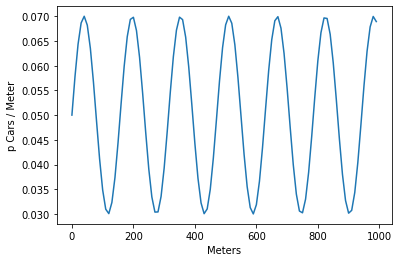

In [5]:
plt.plot(x,p)
plt.xlabel('Meters')
plt.ylabel('p Cars / Meter')
plt.show()

In [6]:
DENSITY_IN = 0.10
FLUX_IN = flux_density_func(DENSITY_IN)

BETA = 1.0 # Rate of leaving [ <= 1]
ALPHA = 1.0

def tick(p, dt):
    p = np.maximum(p, 0)
    p_next = np.zeros(len(p))
    for i in range(len(p_next)):
       
        if i == 0:
            # Boundary case (input)
            prev_flux = FLUX_IN
            current_flux = 0
        else:
            prev_density = p[i-1]
            prev_flux = flux_density_func(prev_density)
    
#         current_flux_2 = prev_flux + (p[i] * (DELTA_X / dt)) * ALPHA
        current_flux_2 = (p[i] * (DELTA_X / dt)) * ALPHA
    
        if i !=0:
            if i == len(p_next) - 1:
                # Boundary case (output)
                current_density = p[i]
                current_flux = (prev_flux + (current_density * (DELTA_X / dt))) * BETA
            elif i == len(p_next) - 2:
                current_density = p[i]
                current_flux = flux_density_func(current_density) 
            else:
                current_density = p[i + 1]
                current_flux = flux_density_func(current_density)
        
        
        p_next_i = p[i] + ((prev_flux - (current_flux + current_flux_2)) * (dt / DELTA_X))
        p_next[i] = p_next_i
    p_next = np.maximum(p_next, 0)
    return p_next
    

7.2e-05


<IPython.core.display.Javascript object>


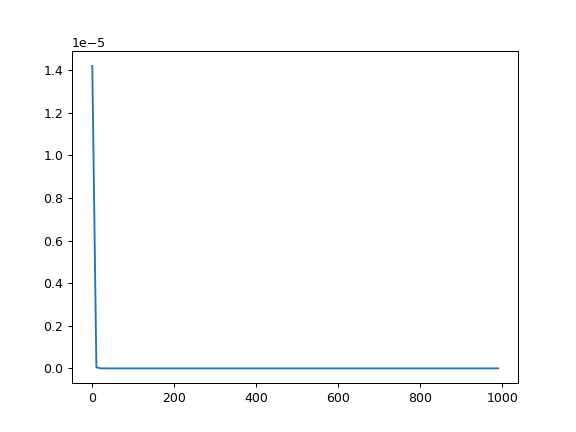

KeyboardInterrupt: 

In [7]:
%matplotlib notebook
STABILITY_FACTOR = 0.001 # Must be less than 1
KPH_TO_MPS = 1 / 3.6
DELTA_TIME = STABILITY_FACTOR * DELTA_X / (V_MAX * KPH_TO_MPS)
print(DELTA_TIME / DELTA_X)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

SIMULATION_TIME = 100
TICKS_PER_DRAW = 1

for i in range(0,int(SIMULATION_TIME / DELTA_TIME / TICKS_PER_DRAW)):
    for i in range(TICKS_PER_DRAW):
        p = tick(p, DELTA_TIME)
    ax.clear()
    ax.plot(x,p)
    fig.canvas.draw()
